In [88]:
import numpy as np
import random
import copy
import math
import matplotlib.pyplot as plt

In [89]:
def euclidean_distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [90]:
def swap(array, i, j):
    array[i], array[j] = array[j], array[i]

In [91]:
def initialize_solution(num_cities):
    # Generisanje pocetnog resenja, na primer, slucajnom permutacijom gradova
    solution = random.sample(range(num_cities), num_cities)
    return solution

In [92]:
def calculate_solution(solution, cities_coordinates):
    # Evaluacija resenja na osnovu ukupnog rastojanja u TSP-u
    total_distance = 0
    num_cities = len(solution)
    
    for i in range(num_cities - 1):
        total_distance += euclidean_distance(cities_coordinates[solution[i]], cities_coordinates[solution[i + 1]])
    
    # Dodajemo rastojanje od poslednjeg do prvog grada
    total_distance += euclidean_distance(cities_coordinates[solution[-1]], cities_coordinates[solution[0]])
    
    return total_distance

In [93]:
def get_neighbors(current_solution):
    neighborhood = []
    n = len(current_solution)

    #zamena dva nasumicno odabrana grada
    for _ in range(n):
        i, j = random.sample(range(1, n), 2)  #preskacem prvi grad
        neighbor = current_solution.copy()
        swap(neighbor, i, j)
        neighborhood.append(neighbor)

    #inverzija dela puta
    for _ in range(n):
        i, j = sorted(random.sample(range(1, n), 2))
        neighbor = current_solution[:]
        neighbor[i:j + 1] = reversed(neighbor[i:j + 1])
        neighborhood.append(neighbor)

    return neighborhood
#optimizacija: eliminise potrebu za pravljenjem kopije celog resenja pri svakoj inverziji dela puta
#direktno se modifikuje trenutno resenje

In [94]:
def find_best_neighbor(non_tabu_neighbors, cities_coordinates):
    best_neighbor = None
    best_distance = float('inf')  # Postavljamo na beskonacno kao pocetnu vrednost

    for neighbor in non_tabu_neighbors:
        current_distance = calculate_solution(neighbor, cities_coordinates)

        if current_distance < best_distance:
            best_distance = current_distance
            best_neighbor = neighbor

    return best_neighbor

In [95]:
def tabu_search_tsp(cities_coordinates, num_iterations, tabu_length):
    # Inicijalizacija pocetnog resenja
    current_solution = initialize_solution(len(cities_coordinates))
    print("pocetno:")
    print(current_solution)
    best_solution = current_solution
    best_value = calculate_solution(current_solution, cities_coordinates)
    tabu_list = []
    
    for iteration in range(num_iterations):
        neighborhood = get_neighbors(current_solution)
        non_tabu_neighbors = [neighbor for neighbor in neighborhood if neighbor not in tabu_list]

        if not non_tabu_neighbors:
            # Svi susedi su na tabu listi, ponovno pokrecemo pretragu
            continue

        next_solution = find_best_neighbor(non_tabu_neighbors, cities_coordinates)
        tabu_list.append(next_solution)

        if len(tabu_list) > tabu_length:
            tabu_list.pop(0)  # Uklanjamo najstarije resenje sa tabu liste
        
        value1 = calculate_solution(next_solution, cities_coordinates)
        value2 = calculate_solution(best_solution, cities_coordinates)
        
        if value1 < value2:
            best_solution = next_solution
            
            if value1 < best_value:
                best_value = value1

        current_solution = next_solution

    return best_solution, best_value

In [96]:
def read_coordinates_from_file(file_path):
    coordinates = []

    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file, start=1):
            # Razdvajanje linije na delove pomocu razmaka
            parts = line.split()

            # Preskakanje praznih linija
            if not parts:
                continue

            # Provera da li linija sadrzi tacno dva broja (x i y koordinate)
            if len(parts) != 2:
                print(f"Skipping line {line_number}: {line.strip()} (invalid values)")
                continue

            # Konvertovanje delova u float vrednosti
            try:
                x, y = map(float, parts)
            except ValueError:
                print(f"Skipping line {line_number}: {line.strip()} (invalid values)")
                continue

            # Dodavanje koordinata u listu
            coordinates.append((x, y))

    return coordinates

In [97]:
cities_coordinates = read_coordinates_from_file('tabu.txt')

In [98]:
#cities_coordinates = [(0, 0), (3, 4), (1, 1), (5, 2)]
best_solution, best_value = tabu_search_tsp(cities_coordinates, 100, 10)
print("Best TSP solution: ", best_solution)
print("Total distance: ", best_value)

pocetno:
[0, 2, 4, 5, 1, 3]
Best TSP solution:  [0, 1, 5, 4, 3, 2]
Total distance:  42.52288808440907


In [99]:
def plot_tsp_solution(cities_coordinates, best_solution):
    # ekstrahujemo koordinate iz solution
    try:
        x_coords = [cities_coordinates[i][0] for i in best_solution]
        y_coords = [cities_coordinates[i][1] for i in best_solution]

        # dodajemo na kraju pocetni cvor
        x_coords.append(x_coords[0])
        y_coords.append(y_coords[0])

        plt.figure(figsize=(8, 6))
        plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b')
        plt.title('TSP Solution')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True)
        plt.show()

    except IndexError as e:
        print(f"Error: {e}. Please check the values in best_solution and cities_coordinates.")


Visual representation of the path: 


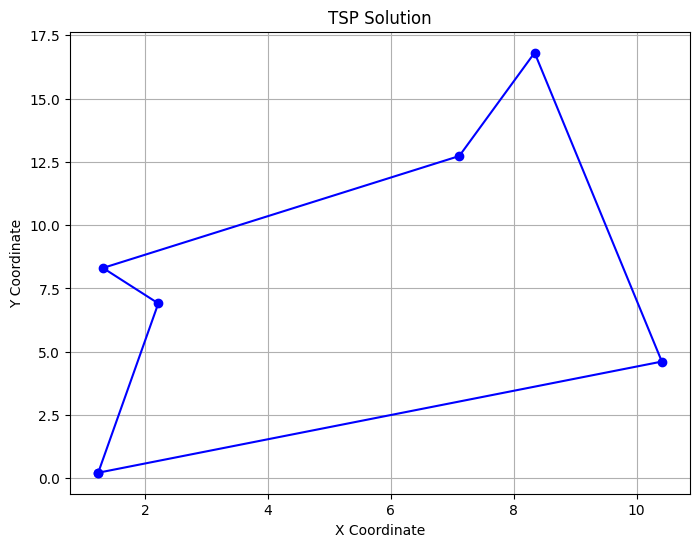

In [100]:
print("Visual representation of the path: ")
plot_tsp_solution(cities_coordinates, best_solution)

Veliki ulazi

In [152]:
import json
import time

In [153]:
def load_test_data(file_path):
    with open(file_path, 'r') as file:
        test_data = json.load(file)
    return test_data

In [154]:
test_data = load_test_data('test_data.json')

In [155]:
cities_coordinates = test_data['cities_coordinates']
num_iterations = test_data['num_iterations']
tabu_length = test_data['tabu_length']

In [156]:
start_time = time.time()
best_solution, best_value = tabu_search_tsp(cities_coordinates, num_iterations, tabu_length)

end_time = time.time()
execution_time = end_time - start_time

print("Najbolje pronadjeno resenje:", best_solution)
print("Najbolja vrednost:", best_value)
print("Vreme izvrsavanja algoritma:", execution_time, "seconds")

pocetno:
[2, 14, 8, 10, 11, 47, 48, 26, 37, 43, 7, 15, 5, 38, 0, 3, 36, 28, 31, 42, 35, 21, 12, 1, 39, 45, 33, 24, 34, 4, 44, 25, 18, 29, 6, 19, 13, 9, 22, 49, 23, 27, 46, 16, 17, 40, 32, 20, 30, 41]
Najbolje pronadjeno resenje: [2, 4, 5, 6, 9, 10, 12, 14, 15, 18, 19, 22, 24, 27, 28, 31, 32, 34, 36, 37, 39, 42, 43, 45, 47, 48, 49, 46, 44, 41, 40, 38, 35, 33, 30, 29, 26, 25, 23, 21, 20, 17, 16, 13, 11, 8, 7, 3, 1, 0]
Najbolja vrednost: 1387.3608682428096
Vreme izvrsavanja algoritma: 4.7804765701293945 seconds


In [ ]:
#primecujemo da sto je manji num_iterations to se program brze izvrsava, kao i da sto je veci broj